In [9]:
import numpy as np
import numpy
import pyscf
import pyscf.gto
import pyscf.qmmm
import pyscf.scf
import pyscf.dft
import pyscf.lib
from pyscf.data import nist
import matplotlib.pyplot as plt
import basis_set_exchange as bse
angstrom = 1 / 0.52917721067
import findiff
import functools
import pandas as pd
import math

In [2]:
#6-31G
basis = {}
basis['S'] = '''BASIS "ao basis" PRINT
N    S
      0.3047524880E+04       0.1834737132E-02
      0.4573695180E+03       0.1403732281E-01
      0.1039486850E+03       0.6884262226E-01
      0.2921015530E+02       0.2321844432E+00
      0.9286662960E+01       0.4679413484E+00
      0.3163926960E+01       0.3623119853E+00
N    SP
      0.7868272350E+01      -0.1193324198E+00       0.6899906659E-01
      0.1881288540E+01      -0.1608541517E+00       0.3164239610E+00
      0.5442492580E+00       0.1143456438E+01       0.7443082909E+00
N    SP
      0.1687144782E+00       0.1000000000E+01       0.1000000000E+01
N    S
      0.4173511460E+04       0.1834772160E-02
      0.6274579110E+03       0.1399462700E-01
      0.1429020930E+03       0.6858655181E-01
      0.4023432930E+02       0.2322408730E+00
      0.1282021290E+02       0.4690699481E+00
      0.4390437010E+01       0.3604551991E+00
N    SP
      0.1162636186E+02      -0.1149611817E+00       0.6757974388E-01
      0.2716279807E+01      -0.1691174786E+00       0.3239072959E+00
      0.7722183966E+00       0.1145851947E+01       0.7408951398E+00
N    SP
      0.2120314975E+00       0.1000000000E+01       0.1000000000E+01
N    S
      0.5484671660E+04       0.1831074430E-02
      0.8252349460E+03       0.1395017220E-01
      0.1880469580E+03       0.6844507810E-01
      0.5296450000E+02       0.2327143360E+00
      0.1689757040E+02       0.4701928980E+00
      0.5799635340E+01       0.3585208530E+00
N    SP
      0.1553961625E+02      -0.1107775495E+00       0.7087426823E-01
      0.3599933586E+01      -0.1480262627E+00       0.3397528391E+00
      0.1013761750E+01       0.1130767015E+01       0.7271585773E+00
N    SP
      0.2700058226E+00       0.1000000000E+01       0.1000000000E+01
END'''
#def2TZVP
basis['L'] = '''BASIS "ao basis" PRINT
N    S
  13575.3496820              0.22245814352E-03
   2035.2333680              0.17232738252E-02
    463.22562359             0.89255715314E-02
    131.20019598             0.35727984502E-01
     42.853015891            0.11076259931
     15.584185766            0.24295627626
N    S
      6.2067138508           0.41440263448
      2.5764896527           0.23744968655
N    S
      0.57696339419          1.0000000
N    S
      0.22972831358          1.0000000
N    S
      0.95164440028E-01      1.0000000
N    P
     34.697232244            0.53333657805E-02
      7.9582622826           0.35864109092E-01
      2.3780826883           0.14215873329
      0.81433208183          0.34270471845
N    P
      0.28887547253           .46445822433
N    P
      0.10056823671           .24955789874
N    D
      1.09700000             1.0000000
N    D
      0.31800000             1.0000000
N    F
      0.76100000             1.0000000
N    S
  19730.8006470              0.21887984991E-03
   2957.8958745              0.16960708803E-02
    673.22133595             0.87954603538E-02
    190.68249494             0.35359382605E-01
     62.295441898            0.11095789217
     22.654161182            0.24982972552
N    S
      8.9791477428           0.40623896148
      3.6863002370           0.24338217176
N    S
      0.84660076805          1.0000000
N    S
      0.33647133771          1.0000000
N    S
      0.13647653675          1.0000000
N    P
     49.200380510            0.55552416751E-02
     11.346790537            0.38052379723E-01
      3.4273972411           0.14953671029
      1.1785525134           0.34949305230
N    P
      0.41642204972           .45843153697
N    P
      0.14260826011           .24428771672
N    D
      1.65400000             1.0000000
N    D
      0.46900000             1.0000000
N    F
      1.09300000             1.0000000
N    S
  27032.3826310              0.21726302465E-03
   4052.3871392              0.16838662199E-02
    922.32722710             0.87395616265E-02
    261.24070989             0.35239968808E-01
     85.354641351            0.11153519115
     31.035035245            0.25588953961
N    S
     12.260860728            0.39768730901
      4.9987076005           0.24627849430
N    S
      1.1703108158           1.0000000
N    S
      0.46474740994          1.0000000
N    S
      0.18504536357          1.0000000
N    P
     63.274954801            0.60685103418E-02
     14.627049379            0.41912575824E-01
      4.4501223456           0.16153841088
      1.5275799647           0.35706951311
N    P
      0.52935117943           .44794207502
N    P
      0.17478421270           .24446069663
N    D
      2.31400000             1.0000000
N    D
      0.64500000             1.0000000
N    F
      1.42800000             1.0000000
END'''

In [6]:
@functools.lru_cache(maxsize=10)
def get_grid(bond):
    mol = pyscf.gto.Mole()
    mol.atom = 'N1 0 0 -%f; N2 0 0 %f'% (bond/2, bond/2)
    mol.basis = {'N1': basis['S'], 'N2': basis['S']}
    mol.verbose = 0
    mol.build()
    grid = pyscf.dft.gen_grid.Grids(mol)
    grid.level = 4
    grid.build() 
    return grid.coords, grid.weights, mol.atom_coords()

@functools.lru_cache(maxsize=2000)
def get_results(method, basisletter, bond, lval):
    mol = pyscf.gto.Mole()
    mol.atom = 'N1 0 0 -%f; N2 0 0 %f'% (bond/2, bond/2)
    mol.basis = {'N1': basis[basisletter], 'N2': basis[basisletter]}
    mol.verbose = 0
    mol.build()
    
    deltaZ = np.array((-1,1)) * lval
    if method in 'HF CCSD'.split():
        calc = pyscf.scf.RHF(mol)
    if method in 'LDA PBE PBE0'.split():
        calc = pyscf.dft.RKS(mol)
        calc.xc = method

    mf = pyscf.qmmm.mm_charge(calc, mol.atom_coords()/angstrom, deltaZ)
    class NoSelfQMMM(mf.__class__):
        def energy_nuc(self):
            q = mol.atom_charges().astype(np.float)
            q += deltaZ
            return mol.energy_nuc(q)
    
    if method in 'HF CCSD LDA PBE PBE0'.split():
        mf = NoSelfQMMM()
        hfe=mf.kernel(verbose=0)
    
    if method == 'CCSD':
        mycc = pyscf.cc.CCSD(mf).run()
        dm1 = mycc.make_rdm1()
        total_energy = mycc.e_tot
        dm1_ao = np.einsum('pi,ij,qj->pq', mf.mo_coeff, dm1, mf.mo_coeff.conj())
    if method in 'HF LDA PBE PBE0'.split():
        dm1_ao = mf.make_rdm1()
        total_energy = hfe
    
    ao_value = pyscf.dft.numint.eval_ao(mol, get_grid(bond)[0], deriv=0)
    rho = pyscf.dft.numint.eval_rho(mol, ao_value, dm1_ao, xctype='LDA')
    
    return total_energy, rho

In [7]:
def build_db():
    res = []
    delta = 0.05
    for method in 'LDA HF PBE PBE0 CCSD'.split():
        for bond in (0.9, 1.0, 1.1, 1.2, 1.3, 1.5):
            for basisletter in 'SL':
                dnn = (6*8-7*7)/(bond*angstrom)
                e_0, rho = get_results(method, basisletter, bond, 0.)
                rho = rho.copy()
                e_t, _ = get_results(method, basisletter, bond, 1.)
                target = e_t-e_0-dnn
                ds = [1/np.linalg.norm(get_grid(bond)[0] - get_grid(bond)[2][site], axis=1) for site in (0, 1)]
                for order in (1, 2, 3, 4, 5, 6):
                    stencil = findiff.coefficients(deriv=order, acc=order)['center']
                    lvals = stencil['offsets'] * delta
                    rhos = [get_results(method, basisletter, bond, _)[1].copy() for _ in lvals]
                    deriv = (stencil['coefficients']*np.array(rhos).T).sum(axis=1) / (delta ** order)
                    rho += deriv / math.factorial(order+1)
                    dE = 0.
                    signs = (-1, 1)
                    for site in (0, 1):
                        dE -= (signs[site] * rho * ds[site] * get_grid(bond)[1]).sum()
                    res.append({'method': method, 'basis': basis, 'bond': bond, 'predicted': e_0+dnn+dE, 'target': e_t})
                    print (method, bond, basisletter, order)
    return res
res = build_db()

LDA 0.9 S 1
LDA 0.9 S 2
LDA 0.9 S 3
LDA 0.9 S 4
LDA 0.9 S 5
LDA 0.9 S 6
LDA 0.9 L 1
LDA 0.9 L 2
LDA 0.9 L 3
LDA 0.9 L 4
LDA 0.9 L 5
LDA 0.9 L 6
LDA 1.0 S 1
LDA 1.0 S 2
LDA 1.0 S 3
LDA 1.0 S 4
LDA 1.0 S 5
LDA 1.0 S 6
LDA 1.0 L 1
LDA 1.0 L 2


KeyboardInterrupt: 

In [67]:
print (bse.get_basis('6-31G(d,p)', 'N', fmt='nwchem'))

#----------------------------------------------------------------------
# Basis Set Exchange
# Version v0.7.0
# https://www.basissetexchange.org
#----------------------------------------------------------------------
#   Basis set: 6-31G(d,p)
# Description: 6-31G + polarization on all atoms
#        Role: orbital
#     Version: 1  (Data from Gaussian 09/GAMESS)
#----------------------------------------------------------------------


BASIS "ao basis" PRINT
#BASIS SET: (10s,4p,1d) -> [3s,2p,1d]
N    S
      0.4173511460E+04       0.1834772160E-02
      0.6274579110E+03       0.1399462700E-01
      0.1429020930E+03       0.6858655181E-01
      0.4023432930E+02       0.2322408730E+00
      0.1282021290E+02       0.4690699481E+00
      0.4390437010E+01       0.3604551991E+00
N    SP
      0.1162636186E+02      -0.1149611817E+00       0.6757974388E-01
      0.2716279807E+01      -0.1691174786E+00       0.3239072959E+00
      0.7722183966E+00       0.1145851947E+01       0.7408951398E+00
N  

## Figure

In [108]:
df = pd.read_csv('results', sep=' ', names='method bond basisset order pred target'.split())
df['abserror'] = abs(df.pred.values - df.target.values)*1000

(-50, 50)

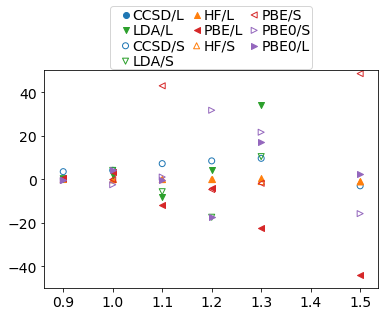

In [109]:
markers = dict(zip('CCSD HF LDA PBE PBE0'.split(), 'o^v<>'))
colors = dict(zip('CCSD HF LDA PBE PBE0'.split(), plt.rcParams['axes.prop_cycle'].by_key()['color']))
for name, group in df.query("order == 3").groupby('method basisset'.split()):
    method, basisset = name
    
    facecolor=None
    if basisset=='S':
        facecolor='none'
    plt.scatter(group.bond.values, (group.pred.values - group.target.values)*1000, marker=markers[method], color=colors[method], facecolor=facecolor, label="%s/%s" % (method, basisset))
handles, labels = plt.gca().get_legend_handles_labels()
order = [0,4,1,5,2,6,3,7,9,8]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order],loc='center', bbox_to_anchor=(0.5, 1.15),ncol=3,handletextpad=-0.5,labelspacing=0.1,borderpad=0.1,columnspacing=-0.2)
plt.ylim(-50, 50)

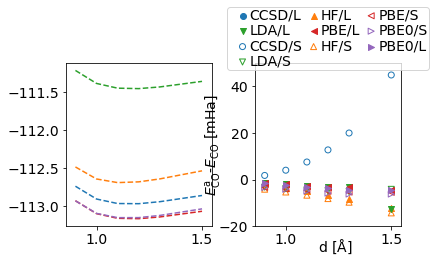

In [114]:
import matplotlib
font = {'family' : 'nomal',
        'weight' : 'normal',
        'size'   : 14}

matplotlib.rc('font', **font)
f, axs = plt.subplots(1, 2, sharex=True, sharey=False, figsize=(6, 3))
markers = dict(zip('CCSD HF LDA PBE PBE0'.split(), 'o^v<>'))
colors = dict(zip('CCSD HF LDA PBE PBE0'.split(), plt.rcParams['axes.prop_cycle'].by_key()['color']))
def panel_c(ax):
    for method in 'CCSD HF LDA PBE PBE0'.split():
        s = df.query("basisset == 'S'").groupby('method bond'.split()).target.mean().reset_index().query('method == @method')
        ax.plot(s.bond.values, s.target.values, '--', color=colors[method])
            
def panel_d(ax):
    for name, group in df.query("order == 2").groupby('method basisset'.split()):
        method, basisset = name

        facecolor=None
        if basisset=='S':
            facecolor='none'
        ax.scatter(group.bond.values, (group.pred.values - group.target.values)*1000, marker=markers[method], color=colors[method], facecolor=facecolor, label="%s/%s" % (method, basisset))
    handles, labels = ax.get_legend_handles_labels()
    order = [0,4,1,5,2,6,3,7,9,8]
    ax.legend([handles[idx] for idx in order],[labels[idx] for idx in order],loc='center', bbox_to_anchor=(0.5, 1.15),ncol=3,handletextpad=-0.5,labelspacing=0.1,borderpad=0.1,columnspacing=-0.2)
    ax.set_ylim(-20, 50)
    ax.set_ylabel(''+ r'$E^\mathrm{a}_\mathrm{CO}$-$E_\mathrm{CO}$ [mHa]',labelpad=-5)
    ax.set_xlabel(r'd [$\mathrm{\AA}$]')
    ax.xaxis.set_label_coords(0.55, -0.07)
    ax.set_xticks((1.,  1.5))
panel_c(axs[0])
panel_d(axs[1])
plt.subplots_adjust(wspace=0.30)

In [98]:
df.query("basisset == 'S'").groupby('method bond'.split()).target.mean().reset_index().query('method == "CCSD"')

,method,bond,target
0,CCSD,0.9,-110.900938
1,CCSD,1.0,-111.083609
2,CCSD,1.1,-111.146415
3,CCSD,1.2,-111.140945
4,CCSD,1.3,-111.099453
5,CCSD,1.5,-110.982236


In [99]:
df.query("basisset == 'S'").groupby('method bond'.split()).target.mean().reset_index().query('method == "PBE"')

,method,bond,target
18,PBE,0.9,-111.087891
19,PBE,1.0,-111.267452
20,PBE,1.1,-111.330568
21,PBE,1.2,-111.327330
22,PBE,1.3,-111.289248
23,PBE,1.5,-111.181246
